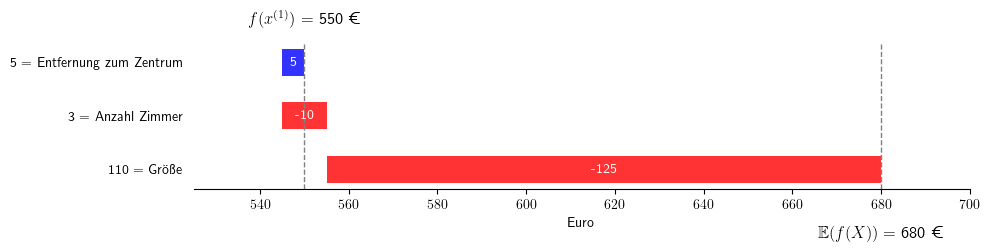

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

erwartungswert = 680
labels = ['110 = Größe', '3 = Anzahl Zimmer', '5 = Entfernung zum Zentrum']
beitraege = [-125, -10, +5]  

kumulative_summe = [erwartungswert]
for beitrag in beitraege:
    kumulative_summe.append(kumulative_summe[-1] + beitrag)

fig, ax = plt.subplots(figsize=(10, 3))

for idx, (beitrag, start) in enumerate(zip(beitraege, kumulative_summe[:-1])):
    ax.barh(idx, beitrag, left=start, color='blue' if beitrag >= 0 else 'red', height=0.5, alpha=0.8)

    text_x = start + beitrag / 2 if beitrag > 0 else start + beitrag / 2
    ax.text(text_x, idx, beitrag, va='center', ha='center', fontsize=10, color='white')


ax.text(erwartungswert, -1.2, r'$\mathbb{E}(f(X)) =$' +f' {erwartungswert} €', va='center', ha='center', fontsize=12, color='black')
ax.text(kumulative_summe[-1], 2.8, r'$f(x^{(1)})$ =' + f' {kumulative_summe[-1]} €', va='center', ha='center', fontsize=12, color='black')

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Euro')

ax.axvline(x=erwartungswert, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=kumulative_summe[-1], color='grey', linestyle='--', linewidth=1)

ax.set_xlim(525, 700)

for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.tick_params(left = False)
plt.savefig('model-output-x1.png', dpi=300)
